In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
train_data = pd.read_csv('dengue_features_train.csv')

In [4]:
train_data.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1262 non-null   float64
 5   ndvi_nw                                1404 non-null   float64
 6   ndvi_se                                1434 non-null   float64
 7   ndvi_sw                                1434 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  1446 non-null   float64
 11  rean

In [5]:
train_data.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [6]:
train_data.shape


(1456, 24)

In [7]:
del train_data['city'] 

In [8]:
train_data


,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,300.771429,...,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0
1452,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,299.392857,...,207.10,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6
1453,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,297.592857,...,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4
1454,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,297.521429,...,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0


In [9]:
# week start date is also not required

In [10]:
del train_data['week_start_date']

In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   year                                   1456 non-null   int64  
 1   weekofyear                             1456 non-null   int64  
 2   ndvi_ne                                1262 non-null   float64
 3   ndvi_nw                                1404 non-null   float64
 4   ndvi_se                                1434 non-null   float64
 5   ndvi_sw                                1434 non-null   float64
 6   precipitation_amt_mm                   1443 non-null   float64
 7   reanalysis_air_temp_k                  1446 non-null   float64
 8   reanalysis_avg_temp_k                  1446 non-null   float64
 9   reanalysis_dew_point_temp_k            1446 non-null   float64
 10  reanalysis_max_air_temp_k              1446 non-null   float64
 11  rean

In [12]:
train_data.head(10
               )

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8
5,1990,23,NaN,0.174850,0.254314,0.181743,9.58,299.630000,299.764286,295.851429,...,26.49,79.891429,9.58,17.212857,2.100000,28.114286,6.942857,34.4,23.9,39.1
6,1990,24,0.112900,0.092800,0.205071,0.210271,3.48,299.207143,299.221429,295.865714,...,38.60,82.000000,3.48,17.234286,2.042857,27.414286,6.771429,32.2,23.3,29.7
7,1990,25,0.072500,0.072500,0.151471,0.133029,151.12,299.591429,299.528571,296.531429,...,30.00,83.375714,151.12,17.977143,1.571429,28.371429,7.685714,33.9,22.8,21.1
8,1990,26,0.102450,0.146175,0.125571,0.123600,19.32,299.578571,299.557143,296.378571,...,37.51,82.768571,19.32,17.790000,1.885714,28.328571,7.385714,33.9,22.8,21.1
9,1990,27,NaN,0.121550,0.160683,0.202567,14.41,300.154286,300.278571,296.651429,...,28.40,81.281429,14.41,18.071429,2.014286,28.328571,6.514286,33.9,24.4,1.1


In [13]:
train_data.isnull()



,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1452,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1453,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1454,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


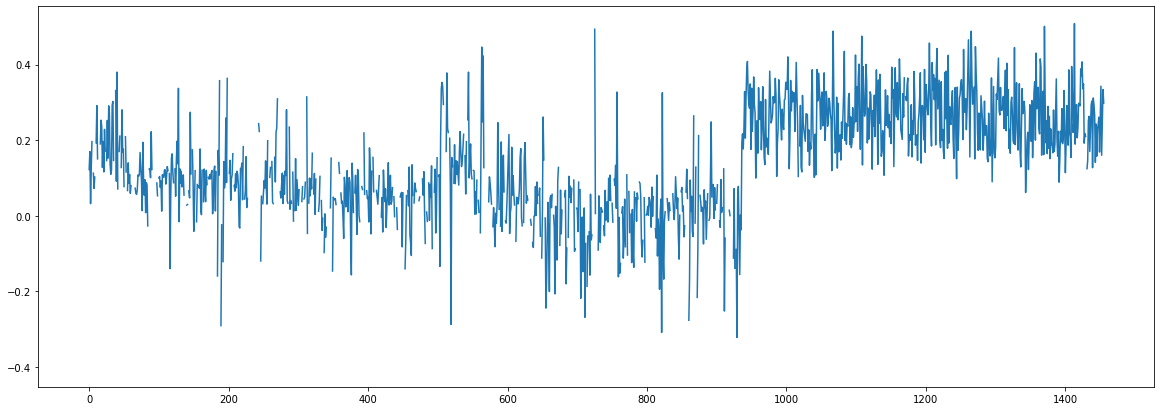

In [14]:
plt.figure(figsize = (20, 7))
plt.plot(train_data['ndvi_ne'])
# as you can see we got some values missing...
# from train_data.info() it's clear that except the 'week', 'weekofyear', every feature has
# missing values...

In [15]:
train_data.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,1456.000000,1456.000000,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,...,1446.000000,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000
mean,2001.031593,26.503434,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,...,40.151819,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360
std,5.408314,15.019437,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,...,43.434399,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,...,0.000000,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000
25%,1997.000000,13.750000,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,...,13.055000,77.177143,9.800000,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000
50%,2002.000000,26.500000,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,...,27.245000,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000
75%,2005.000000,39.250000,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,...,52.200000,86.357857,70.235000,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,...,570.500000,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000


In [16]:

train_data.isnull().head(20)

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
train_data.columns

Index(['year', 'weekofyear', 'ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw',
       'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')

In [18]:
# filling the null values with the respective mean (as there is no categorical variable)

train_data['ndvi_ne'] = train_data['ndvi_ne'].fillna(train_data['ndvi_ne'].mean())
train_data['ndvi_nw'] = train_data['ndvi_nw'].fillna(train_data['ndvi_nw'].mean())
train_data['ndvi_se'] = train_data['ndvi_se'].fillna(train_data['ndvi_se'].mean())
train_data['ndvi_sw'] = train_data['ndvi_sw'].fillna(train_data['ndvi_sw'].mean())
train_data['precipitation_amt_mm'] = train_data['precipitation_amt_mm'].fillna(
    train_data['precipitation_amt_mm'].mean())
train_data['reanalysis_air_temp_k'] = train_data['reanalysis_air_temp_k'].fillna(
    train_data['reanalysis_air_temp_k'].mean())
train_data['reanalysis_avg_temp_k'] = train_data['reanalysis_avg_temp_k'].fillna(
    train_data['reanalysis_avg_temp_k'].mean())
train_data['reanalysis_dew_point_temp_k'] = train_data['reanalysis_dew_point_temp_k'].fillna(
    train_data['reanalysis_dew_point_temp_k'].mean())
train_data['reanalysis_max_air_temp_k'] = train_data['reanalysis_max_air_temp_k'].fillna(
    train_data['reanalysis_max_air_temp_k'].mean())
train_data['reanalysis_min_air_temp_k'] = train_data['reanalysis_min_air_temp_k'].fillna(
    train_data['reanalysis_min_air_temp_k'].mean())
train_data['reanalysis_precip_amt_kg_per_m2'] = train_data['reanalysis_precip_amt_kg_per_m2'].fillna(
    train_data['reanalysis_precip_amt_kg_per_m2'].mean())
train_data['reanalysis_relative_humidity_percent'] = train_data['reanalysis_relative_humidity_percent'].fillna(
    train_data['reanalysis_relative_humidity_percent'].mean())
train_data['reanalysis_sat_precip_amt_mm'] = train_data['reanalysis_sat_precip_amt_mm'].fillna(
    train_data['reanalysis_sat_precip_amt_mm'].mean())
train_data['reanalysis_specific_humidity_g_per_kg'] = train_data['reanalysis_specific_humidity_g_per_kg'].fillna(
    train_data['reanalysis_specific_humidity_g_per_kg'].mean())
train_data['reanalysis_tdtr_k'] = train_data['reanalysis_tdtr_k'].fillna(
    train_data['reanalysis_tdtr_k'].mean())
train_data['station_avg_temp_c'] = train_data['station_avg_temp_c'].fillna(
    train_data['station_avg_temp_c'].mean())
train_data['station_diur_temp_rng_c'] = train_data['station_diur_temp_rng_c'].fillna(
    train_data['station_diur_temp_rng_c'].mean())
train_data['station_max_temp_c'] = train_data['station_max_temp_c'].fillna(
    train_data['station_max_temp_c'].mean())
train_data['station_min_temp_c'] = train_data['station_min_temp_c'].fillna(
    train_data['station_min_temp_c'].mean())
train_data['station_precip_mm'] = train_data['station_precip_mm'].fillna(
    train_data['station_precip_mm'].mean())


In [19]:
train_data['ndvi_ne'].isnull().head(20)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
Name: ndvi_ne, dtype: bool

In [20]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   year                                   1456 non-null   int64  
 1   weekofyear                             1456 non-null   int64  
 2   ndvi_ne                                1456 non-null   float64
 3   ndvi_nw                                1456 non-null   float64
 4   ndvi_se                                1456 non-null   float64
 5   ndvi_sw                                1456 non-null   float64
 6   precipitation_amt_mm                   1456 non-null   float64
 7   reanalysis_air_temp_k                  1456 non-null   float64
 8   reanalysis_avg_temp_k                  1456 non-null   float64
 9   reanalysis_dew_point_temp_k            1456 non-null   float64
 10  reanalysis_max_air_temp_k              1456 non-null   float64
 11  rean

In [21]:
# ndvi n
# ndvi s
# dew point temp
# relative hummidity
# tdtr k
# precip amt per kg
# ne - nw , se - sw
# precipitation - humidity
# station avg temp - station precip

<AxesSubplot:xlabel='year', ylabel='count'>

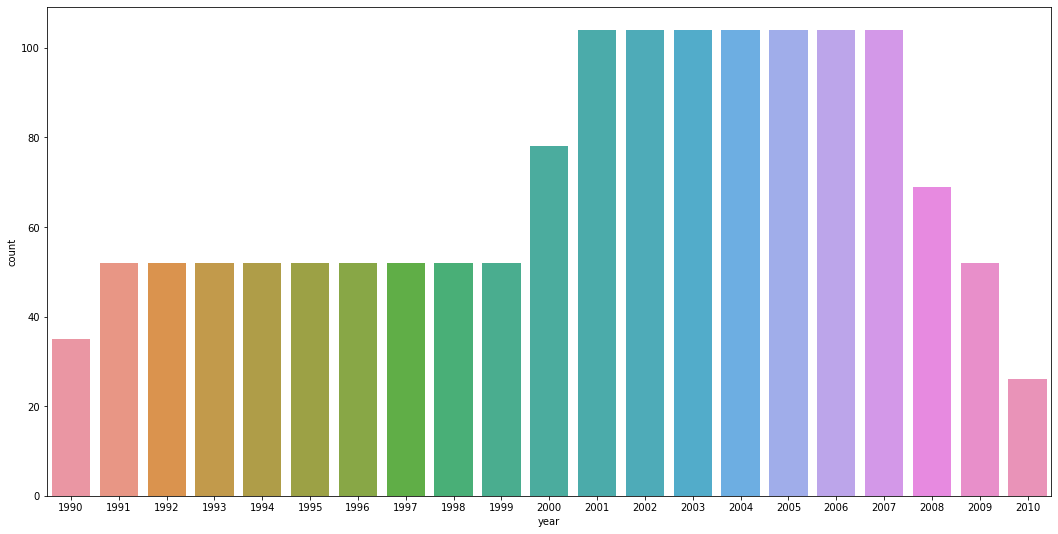

In [22]:
plt.figure(figsize = (18, 9))
sns.countplot(train_data['year'])

<AxesSubplot:>

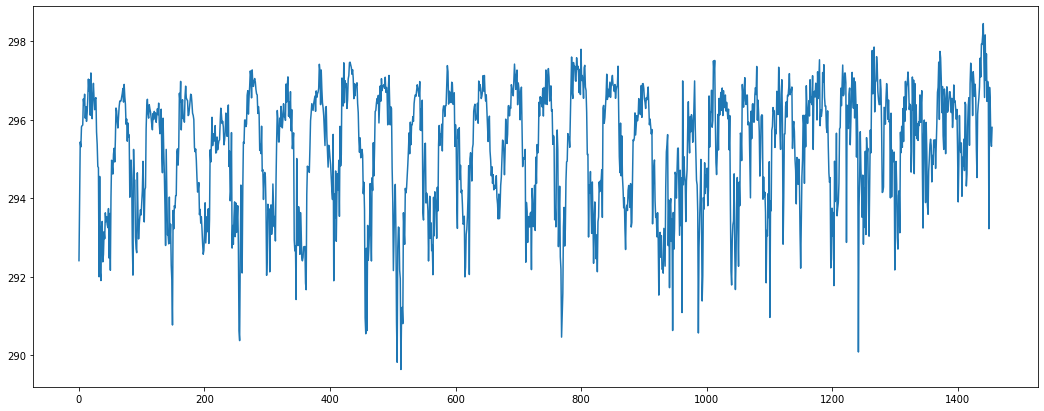

In [23]:
plt.figure(figsize = (18, 7))
train_data['reanalysis_dew_point_temp_k'].plot()

<AxesSubplot:xlabel='reanalysis_relative_humidity_percent', ylabel='Count'>

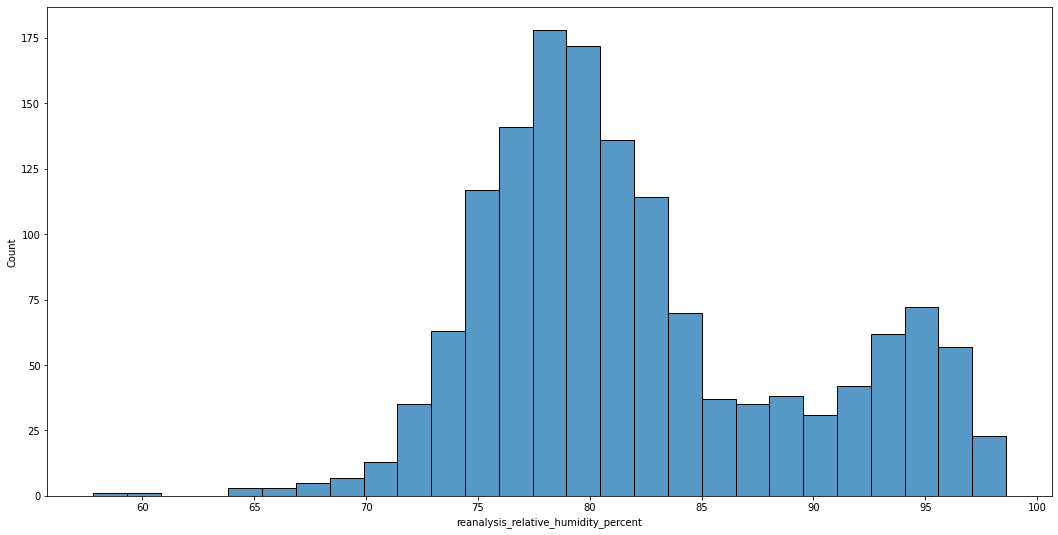

In [24]:
plt.figure(figsize = (18, 9))
sns.histplot(train_data['reanalysis_relative_humidity_percent'])

<AxesSubplot:xlabel='reanalysis_tdtr_k', ylabel='Count'>

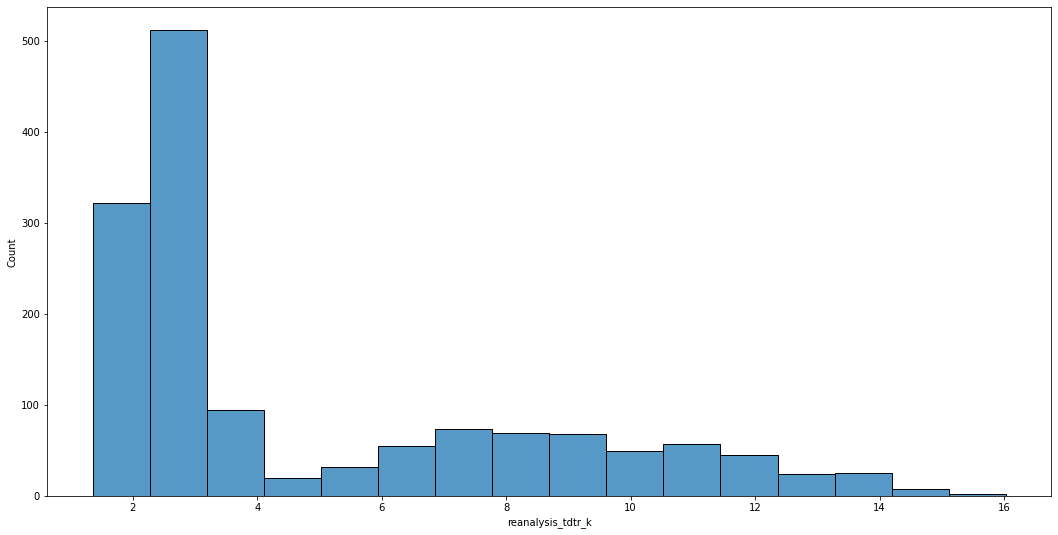

In [25]:
plt.figure(figsize = (18, 9))
sns.histplot(train_data['reanalysis_tdtr_k'])


<AxesSubplot:xlabel='reanalysis_tdtr_k', ylabel='Density'>

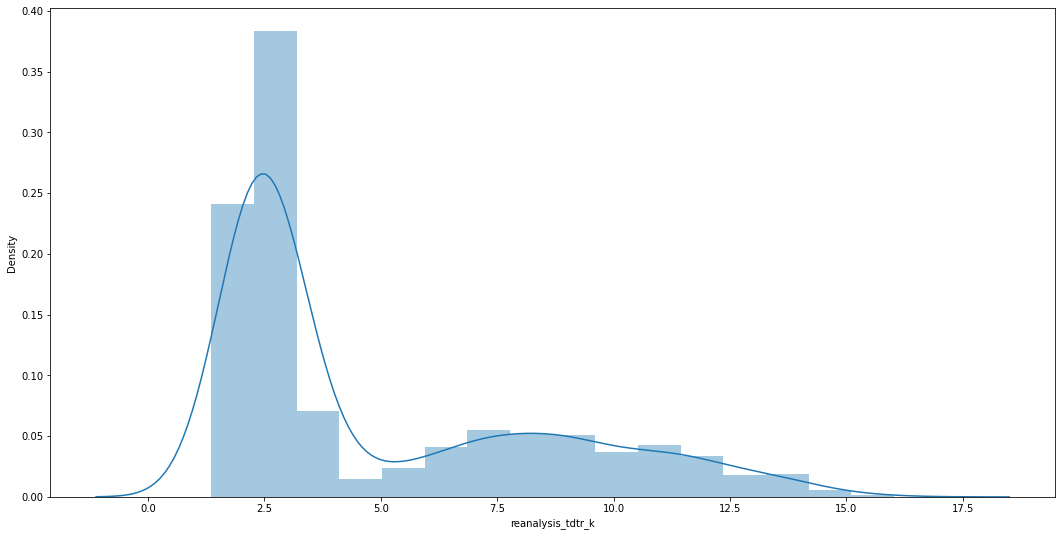

In [26]:
plt.figure(figsize = (18, 9))
sns.distplot(train_data['reanalysis_tdtr_k'])

<AxesSubplot:xlabel='reanalysis_precip_amt_kg_per_m2', ylabel='Count'>

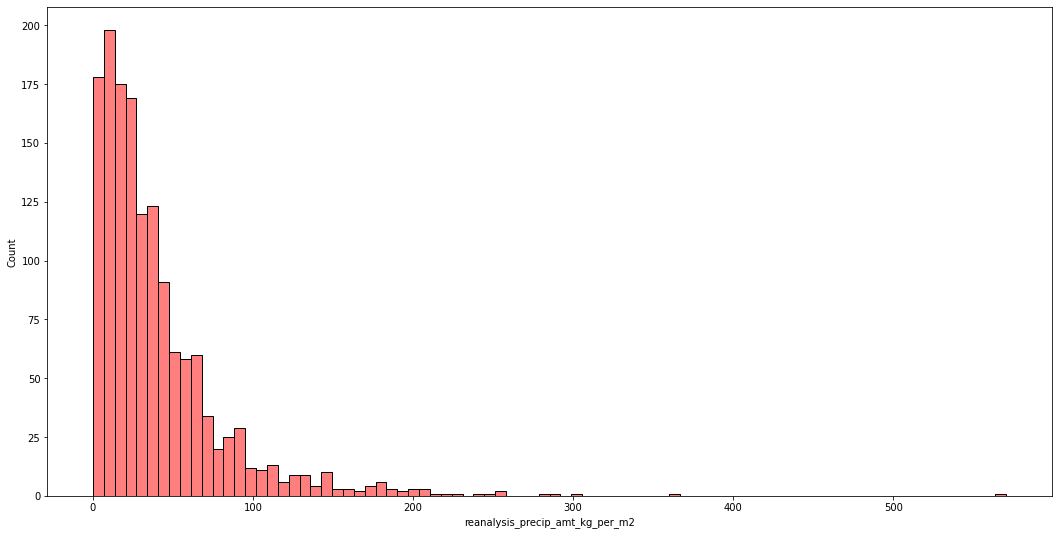

In [27]:
plt.figure(figsize = (18, 9))
sns.histplot(train_data['reanalysis_precip_amt_kg_per_m2'], color = 'r', alpha = 0.5)

<AxesSubplot:xlabel='reanalysis_tdtr_k', ylabel='Count'>

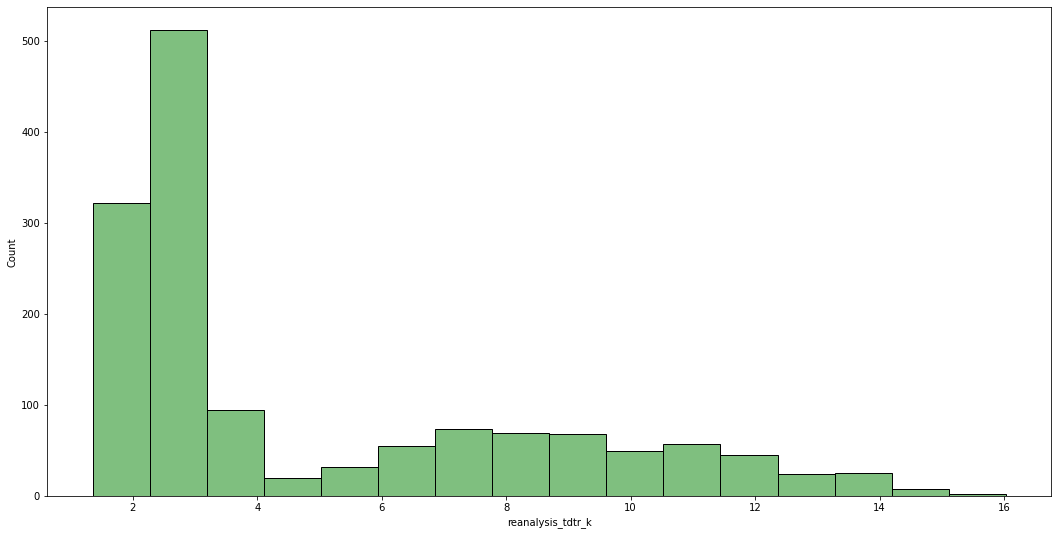

In [28]:
plt.figure(figsize = (18, 9))
sns.histplot(train_data['reanalysis_tdtr_k'], color = 'g', alpha = 0.5)

In [29]:
d1 = train_data.groupby(['station_avg_temp_c', 'station_min_temp_c'])
d1.size().head(20)

station_avg_temp_c  station_min_temp_c
21.400000           18.5                  1
22.842857           17.8                  1
23.314286           19.4                  1
23.400000           17.8                  1
23.414286           18.9                  2
23.614286           20.0                  1
23.700000           19.4                  1
23.714286           19.4                  1
23.757143           17.8                  1
23.914286           19.4                  1
24.000000           19.4                  1
24.042857           18.9                  1
24.057143           18.9                  1
24.171429           19.4                  1
24.185714           19.4                  1
24.214286           21.1                  1
24.250000           16.4                  1
24.285714           20.6                  1
24.300000           21.7                  1
24.328571           19.4                  1
dtype: int64

<AxesSubplot:xlabel='station_precip_mm', ylabel='Count'>

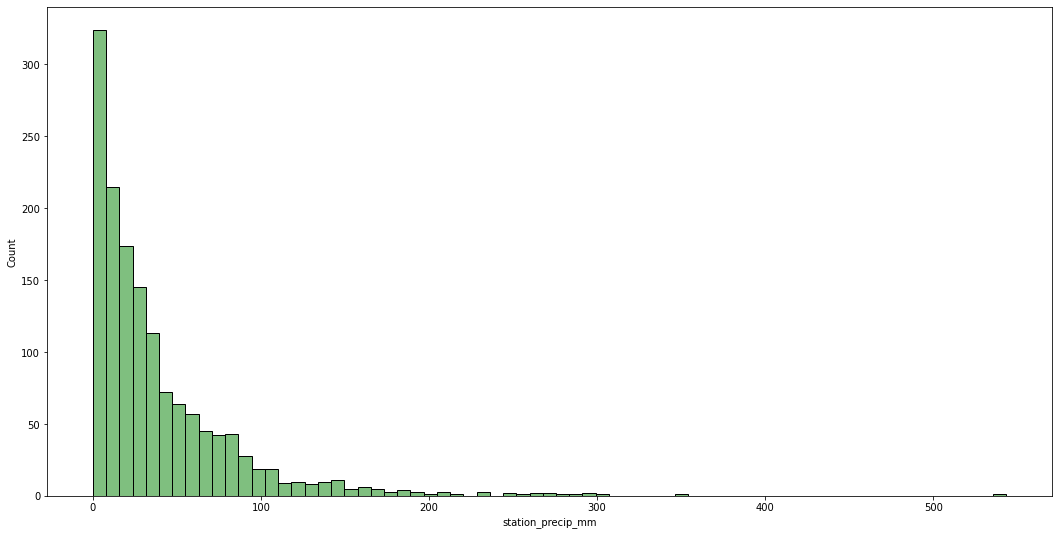

In [30]:
plt.figure(figsize = (18, 9))
sns.histplot(train_data['station_precip_mm'], color = 'g', alpha = 0.5)

<AxesSubplot:xlabel='station_avg_temp_c', ylabel='Density'>

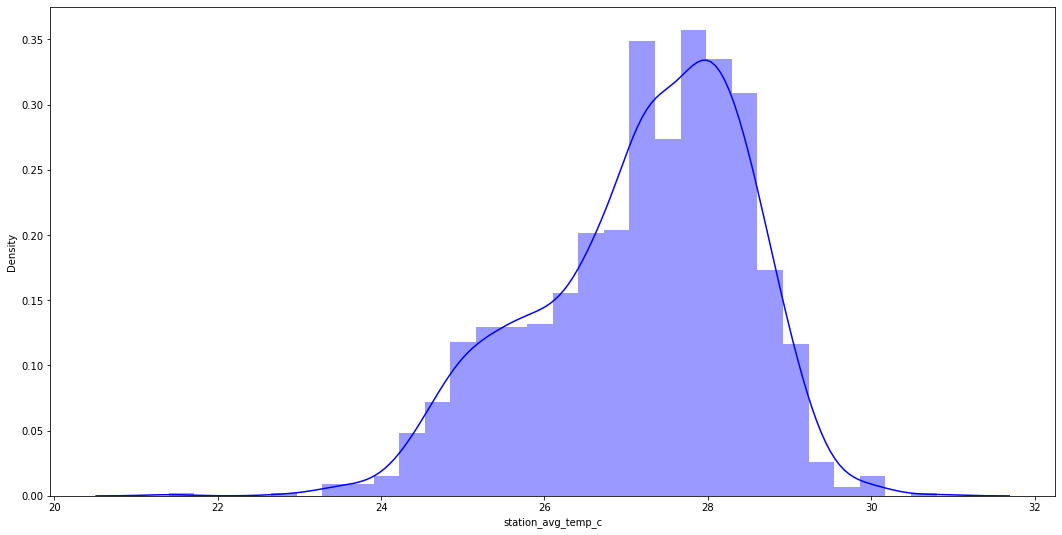

In [31]:
plt.figure(figsize = (18, 9))
sns.distplot(train_data['station_avg_temp_c'], color = 'b')

In [32]:
# sns.pairplot(train_data) 

In [33]:
label_data = pd.read_csv('dengue_labels_train.csv')

In [34]:
label_data.head(10)

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6
5,sj,1990,23,2
6,sj,1990,24,4
7,sj,1990,25,5
8,sj,1990,26,10
9,sj,1990,27,6


In [35]:
label_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   city         1456 non-null   object
 1   year         1456 non-null   int64 
 2   weekofyear   1456 non-null   int64 
 3   total_cases  1456 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 45.6+ KB


In [36]:
label_data.drop(['city', 'year', 'weekofyear'], inplace = True, axis = 1)

In [37]:
label_data

,total_cases
0,4
1,5
2,4
3,3
4,6
...,...
1451,5
1452,8
1453,1
1454,1


In [38]:
final_data = pd.concat([train_data, label_data], axis = 1)

In [39]:
final_data.head(10)

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
5,1990,23,0.142294,0.174850,0.254314,0.181743,9.58,299.630000,299.764286,295.851429,...,79.891429,9.58,17.212857,2.100000,28.114286,6.942857,34.4,23.9,39.1,2
6,1990,24,0.112900,0.092800,0.205071,0.210271,3.48,299.207143,299.221429,295.865714,...,82.000000,3.48,17.234286,2.042857,27.414286,6.771429,32.2,23.3,29.7,4
7,1990,25,0.072500,0.072500,0.151471,0.133029,151.12,299.591429,299.528571,296.531429,...,83.375714,151.12,17.977143,1.571429,28.371429,7.685714,33.9,22.8,21.1,5
8,1990,26,0.102450,0.146175,0.125571,0.123600,19.32,299.578571,299.557143,296.378571,...,82.768571,19.32,17.790000,1.885714,28.328571,7.385714,33.9,22.8,21.1,10
9,1990,27,0.142294,0.121550,0.160683,0.202567,14.41,300.154286,300.278571,296.651429,...,81.281429,14.41,18.071429,2.014286,28.328571,6.514286,33.9,24.4,1.1,6


In [40]:
final_data['total_cases'].max()

461

Text(0.5, 1.0, 'Total dengue Cases weekwise')

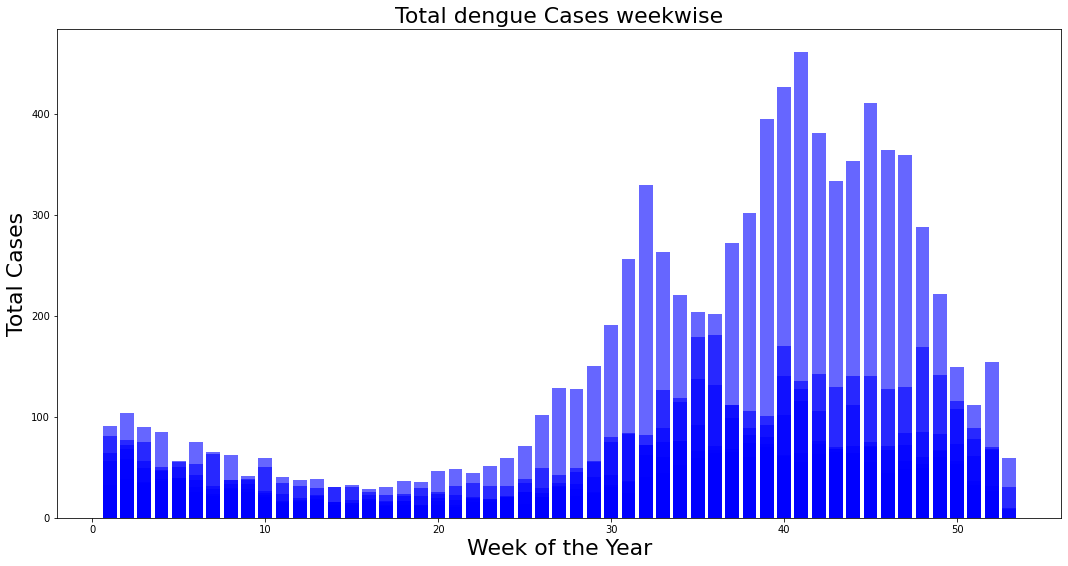

In [41]:
plt.figure(figsize = (18, 9))

plt.bar(final_data['weekofyear'], final_data['total_cases'], color = 'b', 
        alpha = 0.6, linewidth = 0.3)
plt.xlabel('Week of the Year', fontsize = 22)
plt.ylabel('Total Cases', fontsize = 22)
plt.title('Total dengue Cases weekwise', fontsize = 22)


In [42]:
import plotly.offline as iplot
import plotly as py
import cufflinks as cf

In [43]:
py.offline.init_notebook_mode(connected = True)
cf.go_offline()

In [44]:
cf.getThemes()

['ggplot', 'pearl', 'solar', 'space', 'white', 'polar', 'henanigans']

In [45]:
cf.set_config_file(theme = 'solar')


In [46]:
final_data.iplot(kind = 'bar', x = 'weekofyear', y = 'total_cases',
                 barmode = 'stack', bargap = 0.3, color = 'purple', xTitle = 'weekofyear', 
                yTitle = 'totalcases', title = 'Total dengue cases weekwise'
                )

In [47]:
final_data.iplot(x = 'year', y = 'total_cases', kind = 'bar', 
                 barmode = 'stack', bargap = 0.3, color = '#3498db')

In [48]:
final_data.iplot(kind = 'box')
# go through this

In [ ]:
# visualisation, analysis n fun ....
# Have a good one..